In [79]:
# Clear all variables first
#%reset

from __future__ import print_function

# Used for various useful applications, such as basic math and arrays
import numpy as np

# Used for various plotting applications
import matplotlib.pyplot as plt

# Used for useful handling of data and splitting of data
import pandas as pd

# Useful package for machine learning in general
import tensorflow as tf



# Used for training and building the artificial neural network
from tensorflow import keras
from tensorflow.keras import layers


class Station_point:
    def __init__(self, x, z, R, rho, q, m):
        G = 6.67408 *10**-11
        self.A = 4/3*np.pi*G*rho*R**3
        self.g = self.A*z**m/(x**2+z**2)**q
    def norm_g(self, g0):
        self.g0 = self.g/g0

def Measurement_generation(R,rho,m,q,z,Num_points):
    Centre_x = 0
    Centre_y = 0
    p0 = Station_point(0,z,R,rho,q,m)

    Input_data_list_NN = [[0 for x in range (0,2)] for y in range(0,Num_points)]
    Station_points_list = [0 for x in range (0,Num_points)]

    for a in range (0,Num_points):
        Ran_x = np.abs(50*np.random.randn())
        p = Station_point(Ran_x,z,R,rho,q,m)
        p.norm_g(p0.g)
        Input_data_list_NN[a][0] = Ran_x
        Input_data_list_NN[a][1] = p.g0
        Station_points_list[a] = p
    
    Max_x = 0
    for a in range (0,Num_points):
        if (np.max(Input_data_list_NN[a][0]) > Max_x):
            Max_x = np.max(Input_data_list_NN[a][0])
#     for a in range (0,Num_points):
#         Input_data_list_NN[a][0] = Input_data_list_NN[a][0]/Max_x 
    
    return [Input_data_list_NN,Max_x]     

# sample sample
Maxest_x = 0
Maxest_z = 0
X_array = [0 for a in range(0,50000)]
y_array = [0 for a in range(0,50000)]
q_options = [1/2,1,3/2]
index = 0
for a in range(0,2000):
    ran_z = np.abs(150*np.random.rand())
    ran_q_index = np.round(np.abs(2*np.random.rand()))
    ran_q = q_options[np.int(ran_q_index)]
    R = 10
    rho = 2500
    m = 1
    if ran_q==1/2:
        m = -1
    [X,Max_x] = Measurement_generation(R,rho,m,ran_q,ran_z,25)
    if (Max_x > Maxest_x):
        Maxest_x = Max_x
    if (ran_z > Maxest_z):
        Maxest_z = ran_z
    
    y = [[0 for x in range (0,2)] for y in range(0,25)]
    for x in range(0,25):
        y[x][0] = ran_z
        y[x][1] = ran_q
    
    for x in range(0,25):
        X_array[index + x] = X[x]
        y_array[index + x] = y[x]
    index = index + 25
        
for a in range(0,50000):
    X_array[a][0] = X_array[a][0]/Maxest_x
    y_array[a][0] = y_array[a][0]/Maxest_z
    
# print(X_array)
# print(y_array)

features = X_array
labels = y_array
# # Load the Features; list of Time of Flight (0th column), Departure time (1st column) and Arrival time (2nd column)
# # Time of Flight in seconds, Departure time in seconds since 1/1/2020 1:30 PM, Arrival time in seconds since 1/1/2020 1:30 PM
# features=np.loadtxt("Total_Features.txt")
# # Load the Labels; list of Delta V needed at Earth and Delta V needed at Mars
# # Optionally: sum them for a different label
# labels=np.loadtxt("Total_Labels.txt")

In [80]:


# Right now, all features and all labels are used. This can be changed;
# Either one of the flight time, departure time and arrival time is not necessary
# The labels are related, but the ANN doesn't have to output both
# Delta V0 is the Delta V needed of the spacecraft at location Earth
# Delta V1 is the Delta V needed of the spacecraft at location Mars

# Optional different loadings: take Delta V1 as label, or the total Delta V
# 
pdata = pd.DataFrame({'Distance':np.transpose(features)[0],'Gravity':np.transpose(features)[1],'Depth':np.transpose(labels)[0],'Shape':np.transpose(labels)[1]})
# pdata = pd.DataFrame({'Flight time':features[:,0],'Departure time':features[:,1],'Arrival time':features[:,2],'Delta V1':labels[:,1]})
# pdata = pd.DataFrame({'Flight time':features[:,0],'Departure time':features[:,1],'Arrival time':features[:,2],'Total V':(labels[:,0]+labels[:,1])})


# The data set is divided into a training data set and a testing data set
# Currently, the fraction is 80% training and 20% testing. This can be changed, but it is recommended to have more training than testing data
train_dataset = pdata.sample(frac=0.8, random_state=0)
test_dataset = pdata.drop(train_dataset.index)

# Here, we 'pop out' the labels from the features to use them independently
# regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols,
#                                         label_dimension=3,
#                                         hidden_units=[10, 10],
#                                         model_dir="/tmp/boston_model")

train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['Depth', 'Shape']]).T
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['Depth', 'Shape']]).T

# train_label_1 = train_dataset.pop('Depth','Shape')
# test_label_1 = test_dataset.pop('Depth','Shape')

print(train_labels)

print(type(train_labels))
# Optionally different loadings: pop out Delta V1 or total Delta V
# train_labels = train_dataset.pop('Delta V1')
# train_labels = train_dataset.pop('Delta V1')
# train_labels = train_dataset.pop('Delta V1')
# train_labels = train_dataset.pop('Delta V1')

# Now, only features are in the dataset. Rename for clearness
global train_features
train_features = train_dataset
test_features = test_dataset

# Definition of a normalization function to normalize features 
# def norm(x):
#   return (x - np.mean(x)) / np.std(x)

# # The data sets for training and testing data are normalized
# normed_train_features = norm(train_features)
# normed_test_features = norm(test_features)

print(len(train_labels))
print(len(test_labels))

          Depth  Shape
11841  0.695446    1.5
19602  0.926315    1.0
45519  0.566100    1.0
25747  0.884797    1.5
42642  0.155446    0.5
...         ...    ...
8809   0.570311    1.5
47565  0.876227    1.5
412    0.030623    1.0
12293  0.119067    0.5
17267  0.528836    0.5

[40000 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
40000
10000


In [160]:
# The model itself is built here. Different options are available. Listed below are possibilities:

# Change the number of neurons per layer. Default is 64, somewhat lower and higher can be tested
# Change the number of layers. Default is 4, this can be changed
# Change the activation function. Default is tanh
# Change the loss function. Default is mse, optimizer: adam, accuracy: metrics


#########
###############################
#########

def self_supervised_loss(y_actual, y_pred):
    
#     print(type(features))
#     print(type(y_pred))
    features = train_features.values
    y_pred = tf.keras.backend.cast(y_pred, dtype='float32')
    
#     print(type(features))
#     print(type(y_pred))
    X = features[:,0]
    g = features[:,1]
    print(type(y_pred[:,0]))
    print(type(y_pred[:,1]))
    
    print(y_pred[:,0])
    print(len(X))
    
    # custom_loss_value = tf.keras.backend.mean(tf.keras.backend.sum(tf.math.pow(((y_pred[:,0]*150)**2)/((y_pred[:,0]*150)**2+(X*50)**2),(3/2*y_pred[:,1]))-g))

    # custom_loss_value = tf.keras.backend.mean(tf.keras.backend.sum(((y_pred[:,0]*150)+(y_pred[:,0]*150)+(X*50))-g))

    custom_loss_value = tf.keras.backend.mean(tf.keras.backend.sum(y_pred[:,0]*50+X))
    
    print(custom_loss_value) 

    return custom_loss_value

#########
###############################
#########
    
# def baseline_model(features):
#     # create model
#     i = tf.keras.Input(shape=(15,))
#     x = tf.keras.layers.Dense(64, kernel_initializer='glorot_uniform', activation='relu')(i)
#     o = tf.keras.layers.Dense(2, kernel_initializer='normal', activation='linear')(x)
#     model = tf.keras.Model(i, o)
    
#     model.compile(loss=self_supervised_loss(features,model.output), optimizer='adam')
    
    
#     return model    

def keras_custom_loss_function(y_actual, y_predicted):
    print(type(y_predicted))
    sess = tf.Session()
    #with sess.as_default(): print(y_predicted.eval())
    print('featur')
    print(train_features)
    polka = y_predicted+train_features
    custom_loss_value = tf.keras.backend.mean(tf.keras.backend.sum(tf.keras.backend.square((y_predicted)/10)))
    print(custom_loss_value)
    return custom_loss_value

def build_model(): 
    model = keras.Sequential([    
        layers.Dense(64, activation='relu', input_shape=[len(train_features.keys())]),  
        layers.Dense(2)
    ])

    
    
    model.compile(loss= keras_custom_loss_function, # self_supervised_loss,
                optimizer='adam')
    
    ## Different possible loss function:
    # model.compile(loss='mse',              
    # optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),                                       
    # metrics=['accuracy']) 
    
    return model

In [161]:
# Build the model and save this as 'model'
# model = baseline_model(train_features)
model = build_model()

<class 'tensorflow.python.framework.ops.Tensor'>
featur
       Distance   Gravity
11841  0.193047  0.797428
19602  0.033671  0.997215
45519  0.164915  0.847885
25747  0.380146  0.610061
42642  0.221644  0.434460
...         ...       ...
8809   0.001075  0.999989
47565  0.107934  0.953745
412    0.070956  0.080972
12293  0.072117  0.750475
17267  0.132822  0.939329

[40000 rows x 2 columns]


TypeError: object of type 'Tensor' has no len()

In [125]:
# Training of the ANN, or 'fitting'. Default input are normalized training features, training labels, a validation split of 0.2
# The number of epochs should be changed per combination of settings; at some point the model reaches a platform at which it doesn't improve anymore. This should be the maximum amount of epochs
# From previous results, this is usually between 10 and 1000
history = model.fit(train_features, train_labels, validation_split=0.2, epochs=10) 

Train on 32000 samples, validate on 8000 samples
Epoch 1/10


InvalidArgumentError: Incompatible shapes: [32] vs. [40000]
	 [[{{node loss_20/dense_75_loss/add}}]] [Op:StatefulPartitionedCall]

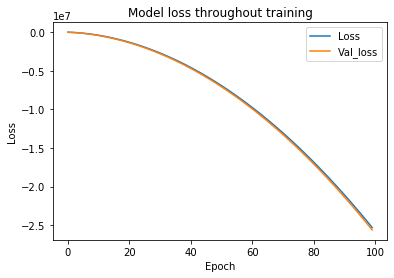

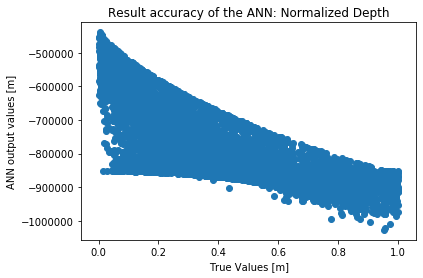

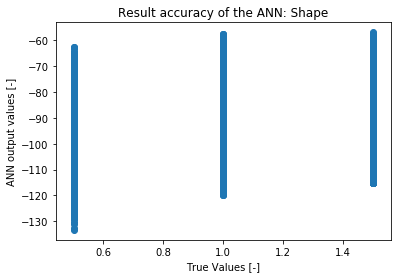

In [106]:
# This section is for interesting plots


# The first plot is of the loss and the validation loss. These ought to decrease rapidly in the first few epochs and should be close together. 
# At some point, the ANN doesn't improve so much anymore. The losses behave randomly there, as improvement is no longer possible
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss throughout training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss','Val_loss'],loc='upper right')
plt.show()

# The second plot is of the true label values and the predicted label values
# We generate a prediction value using the trained model here.
# The choice to use normalized data or not should be consistent with earlier choices
test_predictions = model.predict(test_features)
# What is desired is a plot with a clear straight line with slope 1
# Such a result shows that the predictions are close to the real values
# print(test_labels)

plt.scatter(test_labels.Depth, test_predictions[:,0])
plt.title('Result accuracy of the ANN: Normalized Depth')
plt.xlabel('True Values [m]')
plt.ylabel('ANN output values [m]')
plt.show()

plt.scatter(test_labels.Shape, test_predictions[:,1])
plt.title('Result accuracy of the ANN: Shape')
plt.xlabel('True Values [-]')
plt.ylabel('ANN output values [-]')
plt.show()

In [57]:
model.predict(test_features[1]).flatten()

KeyError: 1